Retos individuales


*   Hackathon: HACK THAT STARTUP 
*   Author: Andrés Cardoso Cordero



INDIVIDUAL CHALLENGE 1 - DATA SCIENCE CORRELATION
----

*a) Realiza un análisis de este dataset y explica de que dos medios eliminarías el gasto en
marketing y a que dos medios aumentarías el gasto en marketing con tal de maximizar los
Ingresos. 
250pt*

*b) Realiza una representación gráfica de los datos que le permitan a Juan entender mejor
tu análisis. 250pt*

In [ ]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Marketing.csv to Marketing.csv


In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
  
df = pd.read_csv(io.BytesIO(uploaded['Marketing.csv'])) 
df.columns

**Análisis**

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,TV,Radio,Periodico,Redes Sociales,Email,Ingresos
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,96.506750,17.259350,14.022500
std,85.854236,14.846809,21.778621,49.824942,26.584668,5.217457
min,0.700000,0.000000,0.300000,6.060000,0.000000,1.600000
25%,74.375000,9.975000,12.750000,51.357500,2.522500,10.375000
50%,149.750000,22.900000,25.750000,99.480000,8.160000,12.900000
75%,218.825000,36.525000,45.100000,137.872500,20.055000,17.400000
max,296.400000,49.600000,114.000000,188.530000,170.650000,27.000000


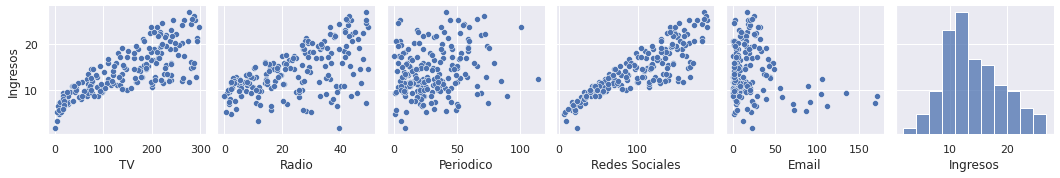

In [ ]:
import warnings
warnings.filterwarnings('ignore')

#scatterplot
sns.set()
cols = df.columns
sns.pairplot(df[cols], size = 2.5, y_vars=['Ingresos'])
plt.show();

Con los plots de arriba podemos fijarnos en las gráficas donde se está intentando dibujar una línea recta de un solo sentido (por ejemplo la que se dibuja entre ingresos y redes sociales). Este comportamiento en concreto indica una **alta dependencencia de la variable target (Ingresos) con respecto a Redes Sociales, TV y Radio**: a más "clara" la línea recta de puntos, más dependencia.

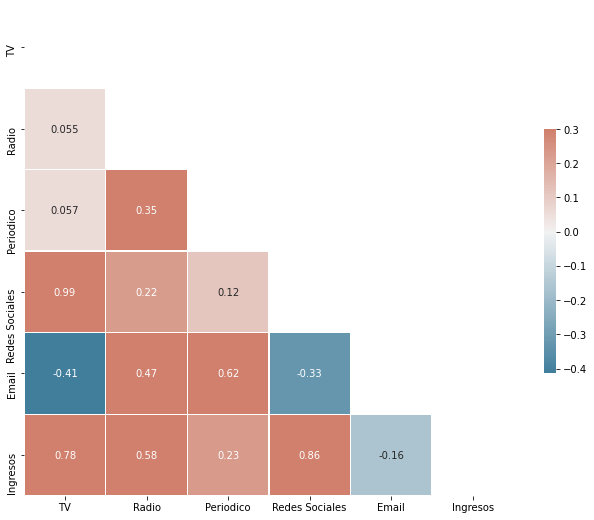

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Con una simple correlación de Pearson podemos ver qué variables/elementos ayudan más a los ingresos y cuáles no:  
*  Los **dos que más** son las *Redes Sociales* (0.86 de correlación con Ingresos) y *TV* (0.78).
*  Los que **menos están aportando** son el *Email* (-0.16) y el *Periódico* (0.23). De hecho, el *Email* está teniendo un aporte negativo a los ingresos, por lo que agraba más que ayudar.
*   Dada la altísima correlación que hay entre TV y Redes sociales (0.99), se podría entrenar un modelo descartando una de las dos variables.





INDIVIDUAL CHALLENGE 2 - DATA SCIENCE LINEAR REGRESSION
----

*a) Determina las mejores variables predictoras para un modelo predictivo lineal, aplica el
modelo con dichas variables y calcula el score. 250pt*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression

# asignamos variables que van a entrenamiento y variable target
x_columns = df.columns[0:5]
X, y = df[x_columns], df.Ingresos

# split train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=66)

# entrenamos un modelo de regresión lineal y con la función de SelectFromModel dejamos que escoja las mejores variables
sel = SelectFromModel(LinearRegression())
sel.fit(X_train, y_train)

print("Las variables más importantes son: ")
best_vars = sel.get_support()
print(X_train.columns[best_vars])

Las variables más importantes son: 
Index(['TV', 'Radio', 'Redes Sociales'], dtype='object')


In [ ]:
# y nos quedamos con las más importantes
X_train, X_test, y_train, y_test = train_test_split(
    X.loc[:, best_vars], y, test_size=0.2, random_state=66)

model = LinearRegression()
model.fit(X_train, y_train)

# obtenemos el score R2
print(" Score final para el modelo con las mejores variables es de :", round(model.score(X_test, y_test) * 100, 2), "%")

 Score final para el modelo con las mejores variables es de : 88.97 %





*b) Empleando como variables predictoras [‘Redes Sociales’] y [‘Email’], predice cuales
serian los ingresos si se aplicasen 500 € a redes sociales y 100 € a radio. 250pt*

In [ ]:
# y nos quedamos con las más importantes
X_train, X_test, y_train, y_test = train_test_split(
    X.loc[:, ['Redes Sociales', 'Email']], y, test_size=0.2, random_state=66)

model = LinearRegression()
model.fit(X_train, y_train)

# obtenemos el score R2
print(" Score final para el modelo con Redes sociales y Email de variables es de :", round(model.score(X_test, y_test) * 100, 2), "%")

# y resolvemos la duda del ENUNCIADO
redes_sociales = 500
email = 100
predicion_enunciado_apartado_b = round(model.predict(np.array([[redes_sociales, email]]))[0], 2)
print(" La respuesta al enunciado sería:", predicion_enunciado_apartado_b)

 Score final para el modelo con Redes sociales y Email de variables es de : 79.86 %
La respuesta al enunciado sería: 52.54


INDIVIDUAL CHALLENGE 3 - DATA SCIENCE NLP
----

*a) Genera un algoritmo de clasificación de texto para el dataset mencionado empleando
para las predicciones la libreria scikit-learn, calcula el score de tu algoritmo. 500pt*










In [ ]:
from sklearn.datasets import fetch_20newsgroups


In [ ]:
data_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

data_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)

In [ ]:
# Pre-procesamiento del texto
import nltk
import re
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm

# funcion para limpiar algunas palabras o caracteres
def clean_data(X):
  documents = []

  stemmer = WordNetLemmatizer()
  for sen in tqdm(range(0, len(X))):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Converting to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)
  return documents

# limpiamos
X_train = clean_data(data_train.data)
X_test = clean_data(data_test.data)

  0%|          | 0/11314 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


100%|██████████| 7532/7532 [00:08<00:00, 855.60it/s]


Modelo con random forest
---

In [ ]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), ('clf', RandomForestClassifier(n_estimators = 1000)),])

text_clf = text_clf.fit(X_train, data_train.target)

CPU times: user 6min, sys: 842 ms, total: 6min 1s
Wall time: 6min 1s


In [ ]:
preds = text_clf.predict(X_test)
print("Accuracy con modelo basado en árboles:", round(accuracy_score(data_test.target, preds) * 100, 2), "%")

Accuracy con modelo basado en árboles: 80.28 %


Modelo usando Tensorflow y redes neuronales (pruebas)
---

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 604867873876257636
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14638920512
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11592379495438481520
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
import scipy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# convertimos texto a integers
vocab_size = 20000
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
x_seq = tokenizer.texts_to_sequences(X_train)

# añadimos padding para que todas las filas tengan la misma longitud
padding_type = 'post'
max_len = 5000
x_train = pad_sequences(x_seq, padding=padding_type, maxlen=max_len)
x_test = pad_sequences(tokenizer.texts_to_sequences(X_test), padding=padding_type, maxlen=max_len)

In [ ]:
from keras import optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [ ]:
# modelo 
model = tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, 64, input_length=x_train.shape[1]),
                            tf.keras.layers.GlobalAveragePooling1D(),
                            tf.keras.layers.Dropout(0.2),
                            tf.keras.layers.Dense(120, activation='sigmoid'),
                            tf.keras.layers.Dense(np.unique(data_train.target).shape[0], activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 5000, 64)          1280000   
_________________________________________________________________
global_average_pooling1d_3 ( (None, 64)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               7800      
_________________________________________________________________
dense_7 (Dense)              (None, 20)                2420      
Total params: 1,290,220
Trainable params: 1,290,220
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# entrenamos (a más epochs, más precisión)
%%time
# lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(
#     monitor="val_accuracy", patience=5, min_lr=1e-5, mode='max')
history = model.fit(x_train, data_train.target, epochs=70, validation_data=(x_test, data_test.target), verbose=2)

Epoch 1/70
354/354 - 14s - loss: 3.0040 - accuracy: 0.0528 - val_loss: 2.9976 - val_accuracy: 0.0535
Epoch 2/70
354/354 - 13s - loss: 2.9921 - accuracy: 0.0586 - val_loss: 2.9802 - val_accuracy: 0.0659
Epoch 3/70
354/354 - 13s - loss: 2.9639 - accuracy: 0.0698 - val_loss: 2.9422 - val_accuracy: 0.0706
Epoch 4/70
354/354 - 13s - loss: 2.9126 - accuracy: 0.0863 - val_loss: 2.8948 - val_accuracy: 0.1040
Epoch 5/70
354/354 - 13s - loss: 2.8511 - accuracy: 0.0979 - val_loss: 2.8242 - val_accuracy: 0.1228
Epoch 6/70
354/354 - 13s - loss: 2.7750 - accuracy: 0.1197 - val_loss: 2.7524 - val_accuracy: 0.1362
Epoch 7/70
354/354 - 13s - loss: 2.6849 - accuracy: 0.1363 - val_loss: 2.6586 - val_accuracy: 0.1326
Epoch 8/70
354/354 - 13s - loss: 2.5876 - accuracy: 0.1654 - val_loss: 2.5669 - val_accuracy: 0.1693
Epoch 9/70
354/354 - 13s - loss: 2.4879 - accuracy: 0.1929 - val_loss: 2.4846 - val_accuracy: 0.1774
Epoch 10/70
354/354 - 13s - loss: 2.3945 - accuracy: 0.2205 - val_loss: 2.4001 - val_accura

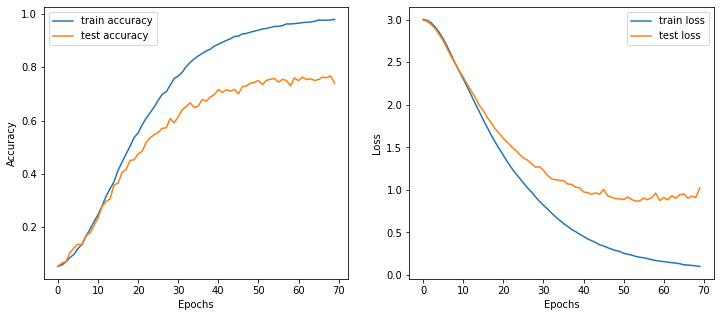

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
ax = plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy'])
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss']);